In [1]:
!conda env list

# conda environments:
#
base                     /mnt/data/hannan/miniconda3
contrastive           *  /mnt/data/hannan/miniconda3/envs/contrastive
deit                     /mnt/data/hannan/miniconda3/envs/deit
steganogan               /mnt/data/hannan/miniconda3/envs/steganogan



In [4]:
!pwd

/mnt/data/hannan/alaska


In [3]:
import sys
sys.path.insert(0, "..")
import os
os.chdir("..")

FileNotFoundError: [Errno 2] No such file or directory: './hannan/alaska'

In [5]:
import steganogan

In [6]:
from steganogan import SteganoGAN
steganogan = SteganoGAN.load(architecture='dense')

/mnt/data/hannan/miniconda3/envs/steganogan/lib/python3.9/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/mnt/data/hannan/miniconda3/envs/steganogan/lib/python3.9/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/mnt/data/hannan/miniconda3/envs/steganogan/lib/python3.9/site-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.activation.LeakyReLU' h

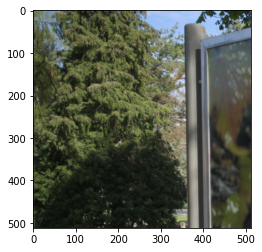

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('./alaska2-image-steganalysis/Cover/00001.jpg'))

In [10]:
!ls

adversarial-attack.ipynb	    last-checkpoint.bin
alaska2-efficientnet-on-tpus.ipynb  README.md
alaska2-image-steganalysis	    steganogan_env.txt
alaska2-image-steganalysis.zip	    SteganoGAN.ipynb
best-checkpoint-143epoch.bin	    train-inference-gpu-baseline-tta-143.ipynb
data-security-project.ipynb


In [13]:
steganogan.encode('alaska2-image-steganalysis/Cover/00001.jpg', 'alaska2-image-steganalysis/SteganoGAN/stego/00001.png', 50*'This is a super secret message!')

In [5]:
!ls

adversarial-attack.ipynb	    last-checkpoint.bin
alaska2-efficientnet-on-tpus.ipynb  README.md
alaska2-image-steganalysis	    SteganoGAN
alaska2-image-steganalysis.zip	    SteganoGAN.ipynb
best-checkpoint-143epoch.bin	    train-inference-gpu-baseline-tta-143.ipynb
data-security-project.ipynb


In [14]:
import random
import string

def get_random_alphanumeric_string(length):
    letters_and_digits = string.ascii_letters + string.digits
    result_str = ''.join((random.choice(letters_and_digits) for i in range(length)))
#     print("Random alphanumeric String is:", result_str)
    return result_str

In [15]:
import os
i = 0
for filename in sorted(os.listdir('alaska2-image-steganalysis/Cover/')):
    if i==200:
        break
    if i%100==0:
        print(filename)
    i = i + 1
    steganogan.encode(f'alaska2-image-steganalysis/Cover/{filename}',
                      f"alaska2-image-steganalysis/SteganoGAN/{filename.replace('jpg', 'png')}",
                      get_random_alphanumeric_string(random.randint(10, 50)))

00001.jpg
00111.jpg
